# Time & Date

In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
from datetime import date

<b>Show the dataframe shape

In [3]:
df=pd.read_excel("marketing_customer_analysis.xlsx")
df.shape

(10910, 26)

In [4]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0.0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1.0,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2.0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3.0,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4.0,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905.0,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906.0,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907.0,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908.0,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
columns=df.columns
columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

<b>Standardize header names

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df.columns = df.columns.str.replace(' ','_')

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,NaN,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,0.0,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,4.0,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


<b>Numerical Columns

In [10]:
Numeric = df.select_dtypes(include='number')
Numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000
1,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331
2,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000
3,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411
4,9025.067525,23675.0,117.0,NaN,31.0,NaN,7.0,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0.0,253.0,NaN,40.0,NaN,7.0,1214.400000
10906,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929
10907,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996
10908,11971.977650,64195.0,158.0,0.0,27.0,4.0,6.0,618.288849


<b>Categorical Columns

In [11]:
Categoric = df.select_dtypes(include=['object'])
Categoric

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


<b>Checking i for existance of NAN

In [12]:
df.isnull().values.any()

True

<b>How many of NAN

In [13]:
df.isna().sum().sum()

9254

<b>Replacing NAN with Unknown

In [14]:
df.replace(np.nan, "Unknown")

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,Unknown,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,Unknown,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,0.0,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,4.0,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


<b>Extract the months from the dataset and store in a separate column

In [15]:
df['month']= pd.DatetimeIndex(df["effective_to_date"]).month
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


<b>Information for the first quarter

In [16]:
filtered=df.query('0< month <4')
filtered

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


<b>Show DataFrame info

In [17]:
df.info
    

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender   income  ...  \
0   

<b>Describe DataFrame

In [18]:
df.describe

<bound method NDFrame.describe of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender   income  ...  \
0 

<b>Show a plot of the total number of responses (for each response type - "Yes"/"No").

<AxesSubplot:>

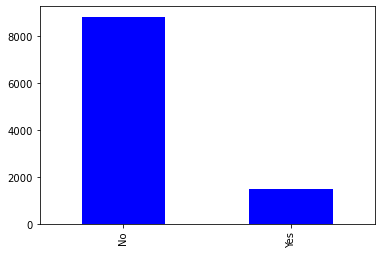

In [19]:
df["response"].value_counts().plot(kind="bar",color="Blue")

<b>Show a plot of the rate of the response types by each Sales Channel

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

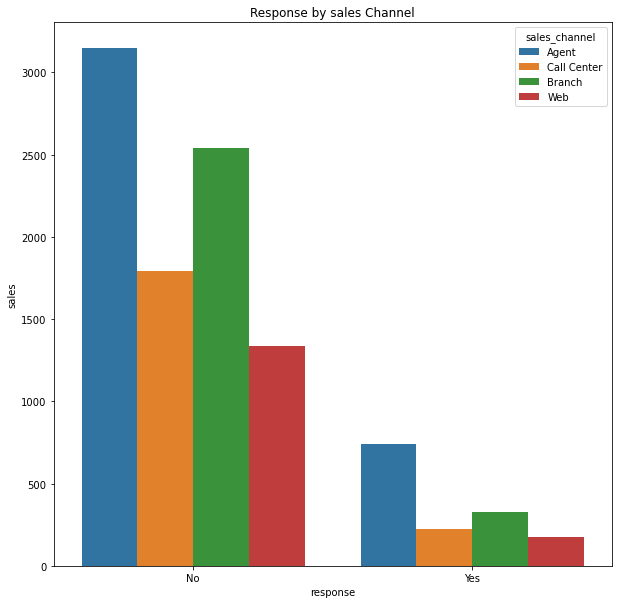

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x="response", hue= "sales_channel", data=df)
plt.ylabel("sales")
plt.title("Response by sales Channel")
plt.show()

<b>Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type

<AxesSubplot:title={'center':'total_claim_amount'}, xlabel='response'>

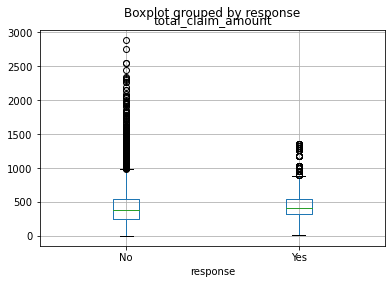

In [22]:
df.boxplot(by ='response', column =['total_claim_amount']) 

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

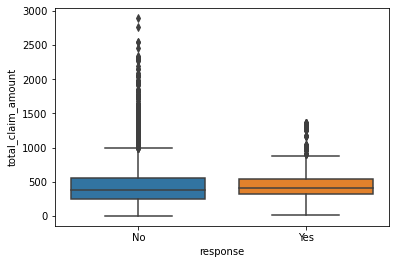

In [23]:
sns.boxplot(x ='response', y="total_claim_amount", data=df)

<b>For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

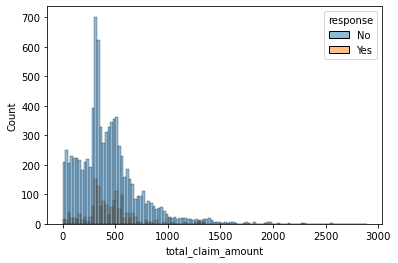

In [24]:
sns.histplot(df, x="total_claim_amount", hue="response")

<b>Create similar plots like in the task before, but for Income

<AxesSubplot:xlabel='income', ylabel='Count'>

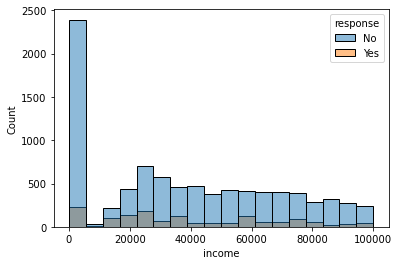

In [28]:
sns.histplot(df, x="income", hue="response")

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

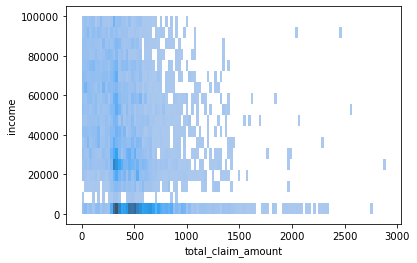

In [27]:
sns.histplot(df, x="total_claim_amount", y="income")

<b>Create a scatterplot between Total Claim Amount and Income

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

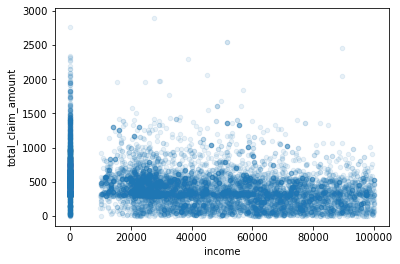

In [36]:
df.plot.scatter(x='income',y='total_claim_amount',colormap='viridis', alpha=0.1)

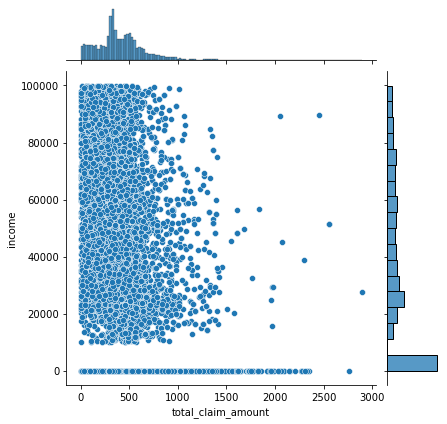

In [32]:
sns.jointplot(x=df['total_claim_amount'], y=df['income'])